In [2]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

os.chdir(path_data_X)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename :
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]  
    global ordered_filenames
    ordered_filenames=pd.DataFrame()
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        #filename_wobw = filename_wopath.split('_bw')[0]+".png"
        #print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        #print(matching_y)
        if len(matching_y) == 1:
            file_lab = pd.DataFrame()
            lab = matching_y.iloc[0,2] #1st elem contains string NF/FOUND
            label.append(lab) 
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            #print(np_array.shape)
            
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            
            file_lab = pd.DataFrame(np.array([[filename_wopath,lab]]))
            #print(file_lab)
            ordered_filenames = ordered_filenames.append(file_lab, ignore_index=True)
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue
            
    #print(ordered_filenames)
    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)



3406
1704


In [1]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [2]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [5]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/usr/local/lib64/python3.6/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [7]:
import pandas as pd
import seaborn as sns

In [8]:

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.845299
1,Linear_SVM,0.769231
2,Polynomial_SVM,0.783761
3,RBF_SVM,0.702564
4,Gaussian_Process,0.861538
5,Gradient_Boosting,0.824786
6,Decision_Tree,0.773504
7,Extra_Trees,0.850427
8,Random_Forest,0.817094
9,Neural_Net,0.658974


In [9]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.845299
1,Linear_SVM,0.769231
2,Polynomial_SVM,0.783761
3,RBF_SVM,0.702564
4,Gaussian_Process,0.861538
5,Gradient_Boosting,0.824786
6,Decision_Tree,0.773504
7,Extra_Trees,0.850427
8,Random_Forest,0.817094
9,Neural_Net,0.658974


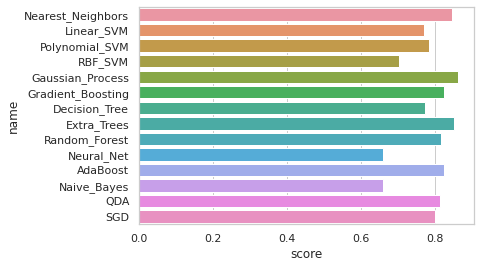

In [10]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [4]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.gaussian_process.kernels import RBF

clf_GP = GaussianProcessClassifier(1.0 * RBF(1.0))

clf_GP.fit(X_train, y_train)
score = clf_GP.score(X_test, y_test)




TypeError: 'numpy.float64' object is not callable

In [5]:


print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

AttributeError: 'GaussianProcessClassifier' object has no attribute 'predict_classes'

In [6]:
y_pred = clf_GP.predict(X_test)

In [7]:
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

accuracy score: 85.08845829823083


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       436
           1       0.90      0.86      0.88       751

    accuracy                           0.85      1187
   macro avg       0.84      0.85      0.84      1187
weighted avg       0.85      0.85      0.85      1187

[[361  75]
 [102 649]]
